### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import scipy as sc
from PIL import Image
from skimage import color
from skimage import io
from matplotlib import colors

### 1D functions

In [2]:
# calculates nth Element of kth basis vector
def calc_bkn(N,k,n):
    if k == 0:
        alpha = np.sqrt(1/N)
        return alpha * np.cos(((2*n+1)*k*np.pi)/(2*N))
    alpha = np.sqrt(2/N)
    return alpha * np.cos(((2*n+1)*k*np.pi)/(2*N))

# calculates kth basis vector
def calc_bk(N,k):
    bk = list(range(N))
    for i in range(N):
        bk[i] = calc_bkn(N,k,i)
    return np.array(bk)

# calculates C
def calc_C(N):
    C = np.eye(N)
    for i in range(N):
        for j in range(N):
            C[i,j] = calc_bkn(N,i,j)
    return C
    
# calculates dct of s
def transform(s):
    C = calc_C(len(s))
    return np.matmul(C,s)

# calculates back transformation
def backtransform(t):
    CT = calc_C(len(t)).transpose()
    return np.matmul(CT,t)

# calculates energy of vektor based on parsevals theorem
def parseval(v):
    energy = np.inner(v,v)
    return energy

def kth_cos(N,k):
    x = np.linspace(-1/2,N-1/2,1024)
    y = np.cos(((2*x+1)*k*np.pi)/(2*N))
    return x,y

def plotCosBase(N):
    fig, axs = plt.subplots(8,1, figsize=(8,6))
    x = np.linspace(-1/2,N-1/2,1024)
    for i in range(N):
        y = np.cos(((2*x+1)*i*np.pi)/(2*N))
        axs[i].set_xticklabels([])
        axs[i].set_xticks([])
        axs[i].set_yticklabels([])
        axs[i].set_yticks([])
        axs[i].spines['bottom'].set_color('white')
        axs[i].spines['top'].set_color('white') 
        axs[i].spines['right'].set_color('white')
        axs[i].spines['left'].set_color('white')
        axs[i].plot(x,y)
    axs[N-1].set_xticks(list(range(0,N)))
    axs[N-1].set_xticklabels(list(range(0,N)))
    plt.show()
    

### 2D functions

In [3]:
# calculates 2D basis img at index (k,l)
def calc_Bkl(N,k,l):
    return np.array(np.outer(calc_bk(N,k), calc_bk(N,l).transpose()))

def dct2D(imgarr):
    N = imgarr.shape[0]
    dct = np.eye(N)
    for i in range(N):
        for j in range(N):
            B_kl = calc_Bkl(N,i,j)
            dct[i,j] = np.sum(B_kl * imgarr)
    return dct

def idct2D(imgarr):
    N = imgarr.shape[0]
    p = np.zeros((N,N))
    for k in range(N):
        for l in range(N):
            p += calc_Bkl(N,k,l) * imgarr[k,l]
    return p
    

def plotheat(img):
    img_abs = np.abs(img)
    fig, ax = plt.subplots()
    im = ax.imshow(img, cmap=plt.get_cmap('gray'), interpolation='nearest', norm=colors.Normalize(vmin=-128, vmax=127))
    plt.xticks([])
    plt.yticks([])
    #fig.colorbar(im, ax=ax)
    img_2 = np.round(img,0)
    img_2 = img_2.astype(int)
    #for i in range(len(img)):
       # for j in range(len(img)):
           # if img_abs[i,j] >= 140000:
                #text = ax.text(j, i, img_2[i, j], ha="center", va="center", color="k")
          #  else:
                #text = ax.text(j, i, img_2[i, j], ha="center", va="center", color="w")
    plt.savefig('sum.svg')
    plt.show()


def readimggray(path):
    img = np.array(Image.open(path).convert('L'))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.get_cmap('gray'), norm=colors.NoNorm())
    plt.savefig('greyOriginal.svg')
    return img



### Plotting

In [60]:
def plotCosStem(N, k):
    fig, ax = plt.subplots(figsize=(6,3))
    
    # Data for the cosine function
    n = np.linspace(0, N-1, N)  # Discrete positions for the stem plot
    ys = np.cos(((2 * n + 1) * k * np.pi) / (2 * N))
    x = np.linspace(-1/2, N-1/2, 1024)  # Smooth x for the cosine function
    y = np.cos(((2 * x + 1) * k * np.pi) / (2 * N))
    # Plot the smooth cosine function
    ax.plot(x, y)
    # Plot the stem plot
    container = ax.stem(n, ys, basefmt=" ")  # Remove default baseline
    container.markerline.set_markersize(10)
    # Draw an extended baseline
    ax.hlines(y=0, xmin=-1/2, xmax=N-1/2, color='red', linestyle='-', linewidth=1)
    plt.show()

def plotSimpleCos(k,path):
    fig, ax = plt.subplots(figsize=(3, 3))
    plt.setp(ax.spines.values(), linewidth=3)
    #ax.spines['bottom'].set_color('darkorange')
    #ax.spines['top'].set_color('darkorange') 
    #ax.spines['right'].set_color('darkorange')
    #ax.spines['left'].set_color('darkorange')
    x = np.linspace(0,8,1024)
    x_dot = np.linspace(0.5,7.5,8)
    y_dot = np.cos(np.pi*k*x_dot/8)
    y = np.cos(np.pi*k*x/8)
    plt.xticks([])
    plt.yticks([])
    ax.plot(x,y,color='tab:orange')
    ax.plot(x_dot, y_dot, '.', markersize=20, color='tab:orange')
    plt.savefig(path)
    plt.show()

# pretty useless without y scaling...
def plotDctCos(k, pixels):
    fig, ax = plt.subplots(figsize=(3, 3))
    dct = transform(pixels[0])
    x = np.linspace(0,8,1024)
    x_dot = np.linspace(0.5,7.5,8)
    if k == 0:
        y = np.sqrt(1/8) * dct[0] * np.cos(np.pi*k*x/8)
        y_dot = np.sqrt(1/8) * dct[0] * np.cos(np.pi*k*x_dot/8)
    else:
        y = np.sqrt(2/8) * dct[0] * np.cos(np.pi*k*x/8)
        y_dot = np.sqrt(2/8) * dct[0] * np.cos(np.pi*k*x_dot/8)
    plt.xticks([])
    plt.yticks([])
    ax.plot(x,y,color='slateblue')
    ax.plot(x_dot, y_dot, '.', markersize=20, color='darkslateblue')
    plt.show()

def plotPixels(pixels):
    fig, ax = plt.subplots(figsize=(3, 3))
    plt.setp(ax.spines.values(), linewidth=3)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    x = np.linspace(0,8,1024)
    x_dot = np.linspace(0.5,7.5,8)
    y_dot = pixels[0]
    dct = transform(y_dot)
    y = [0] * 1024
    for i in range(1,8):
        y += dct[i] * np.sqrt(2/8) * np.cos(np.pi*i*x/8)
    y += dct[0] * np.sqrt(1/8) * np.cos(np.pi*0*x/8)
    ax.plot(x,y,color='tab:blue')
    ax.plot(x_dot, y_dot, '.', markersize=20, color='tab:blue')
    #ax.set_ylim([0, 255])
    plt.xticks([])
    plt.yticks([])
    plt.savefig('pixels.svg')

def plotPixelImg(pixels):
    fig, ax = plt.subplots()
    im = ax.imshow(pixels, cmap=plt.get_cmap('gray'), norm=colors.Normalize(vmin=-128, vmax=127))
    plt.xticks([])
    plt.yticks([])
    #fig.colorbar(im, ax=ax, ticks=[0, 128, 255])
    #for i in range(len(pixels)):
        #for j in range(len(pixels)):
            #text = ax.text(j, i, pixels[i, j], ha="center", va="center", color="w")
    plt.savefig('reverseGray.svg')

def plotcos2dheat(N,k,l):
    # x, y = np.meshgrid(np.linspace(0,N,N), np.linspace(0,N,N))
    z = calc_Bkl(N,k,l)
    if k == 0 and l == 0:
        plt.imshow(z, cmap='Greys_r', interpolation='nearest', norm=colors.Normalize(vmin=-0.24, vmax=0.24))
    else:
        plt.imshow(z, cmap='Greys_r', interpolation='nearest', norm=colors.Normalize(vmin=-0.24, vmax=0.24))
    plt.savefig('2dbasis.svg')
    plt.show()
    
    return z

def plot2Dbasis(N):
    fig, axs = plt.subplots(N,N, gridspec_kw=dict(hspace=0.1, wspace=0.1), figsize=(42,42))
    #plt.xticks([])
    #plt.yticks([])
    #plt.subplots_adjust(wspace=0, hspace=0)
    for k in range(N):
        for l in range(N):
            plt.setp(axs[k,l].spines.values(), linewidth=2)
            axs[k,l].set_xticklabels([])
            axs[k,l].set_xticks([])
            axs[k,l].set_yticklabels([])
            axs[k,l].set_yticks([])
            axs[k,l].spines['bottom'].set_color('black')
            axs[k,l].spines['top'].set_color('black') 
            axs[k,l].spines['right'].set_color('black')
            axs[k,l].spines['left'].set_color('black')
            z = calc_Bkl(N,k,l)
            if k == 0 and l == 0:
                axs[k,l].imshow(z, cmap='Greys_r', interpolation='nearest', norm=colors.Normalize(vmin=-0.24, vmax=0.24))
            else:
                axs[k,l].imshow(z, cmap='Greys_r', interpolation='nearest', norm=colors.Normalize(vmin=-0.24, vmax=0.24))
    plt.savefig('8by8basis.svg')
    plt.show()

def randomSamples2d():
    fig, ax = plt.subplots()
    x = np.random.random_sample(1000)
    y = [0] * 1000
    for i in range(1000):
        y[i] = x[i] + np.random.normal(0, 0.1)
    ax.plot(x,y, '.')
    plt.show()

# extract pixelpairs of 128x128 png grey scale
def plotPixelPairs(path):
    img = readimggray(path)
    # print(img)
    x = [0] * (128*64)
    y = [0] * (128*64)
    for i in range(128):
        for j in range(0,128,2):
            x[i*18 + (j//2)] = img[i,j]
    for i in range(128):
        for j in range(1,128,2):
            y[i*18 + ((j-1)//2)] = img[i,j]
    fig, ax = plt.subplots()
    ax.plot(x,y,'.', markersize=1)
    plt.savefig('pixelPairs.svg')
    # plt.show()
    return x, y

def plotPairs(x,y,path):
    x_2 = 100
    y_2 = 2
    y_3 = 0
    fig, ax = plt.subplots()
    ax.set_ylim([-90, 90])
    ax.plot(x,y,'.', markersize=1)
    ex = transform([109,111])
    #ax.plot(ex[0],ex[1],'o', markersize=10)
    #ax.plot(ex[0],0,'o', markersize=10, color='tab:red')
    #ax.plot(x_2,y_2,'o', markersize=10)
    #ax.plot(x_2,y_3,'o', markersize=10, color='tab:red')
    plt.savefig(path)
    plt.show()

# not that great...
def plotcos2dwire(N, n, k):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d', computed_zorder=False)
    
    # smooth Data
    x = np.linspace(-1/2,N-1/2,N)
    y = np.linspace(-1/2,N-1/2,N)
    X, Y = np.meshgrid(x,y)
    Z = np.cos(n*np.pi*(2*X+1)/(2*N)) * np.cos(k*np.pi*(2*Y+1)/(2*N)) + np.cos(1*np.pi*(2*X+1)/(2*N)) * np.cos(3*np.pi*(2*Y+1)/(2*N))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.plot_surface(X,Y,Z,cmap='viridis', norm=colors.Normalize())
   #for i in range(N):
        #for j in range(N):
            #ax.scatter(i,j,np.cos(n*np.pi*(2*i+1)/(2*N)) * np.cos(k*np.pi*(2*j+1)/(2*N)), '.', s=30, color='tab:blue')
    plt.savefig('surface1.svg')
    plt.show()

[19 26 35 ...  0  0  0]
[24 28 41 ...  0  0  0]
[[1.         0.99883799]
 [0.99883799 1.        ]]
[30 38 53 ...  0  0  0]
[-3 -1 -4 ...  0  0  0]
[[ 1.         -0.08730794]
 [-0.08730794  1.        ]]


FileNotFoundError: [Errno 2] No such file or directory: '/home/lennard/repos/dct/8by8.bmp'

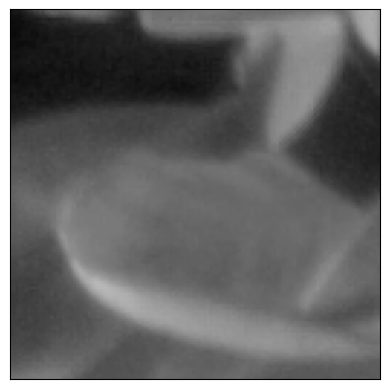

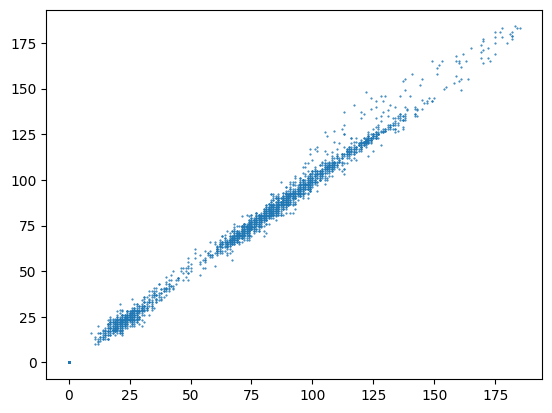

In [5]:
# print(transform(s))
# print(sc.fftpack.dct(s,norm='ortho'))
# s = [1,2,4,7,8,4,3,2]

# z1 = plotcos2dheat(8,6,4)
# z2 = plotcos2dheat(8,6,4)

#img = readimggray("test2.png")
# plt.imshow(img, cmap=plt.get_cmap('gray'))
#dct = dct2D(img)
#matrix = np.absolute(dct)
#min_k = np.amin(matrix)
#max_k = np.amax(matrix)
#plt.imshow(matrix[:32,:32], cmap=plt.get_cmap('magma'))
#plt.imshow(matrix[:32,:32], cmap=plt.get_cmap('magma'), norm=colors.LogNorm())
#out = idct2D(dct)
# plt.imshow(out, cmap=plt.get_cmap('gray'))

#for i in range(8):
#    path = "minicos" + str(i) + ".svg"
#    plotSimpleCos(i, path)

#pixels = readimggray('8pixel.png')
#plotPixels(pixels)

# plot2Dbasis(8)
#plotcos2dheat(8,7,7)

x,y = plotPixelPairs('test2.png');
x = np.array(x).astype(int)
y = np.array(y).astype(int)
print(x)
print(y)
print(np.corrcoef(np.array([x,y])))
for i in range(len(x)):
    t = transform([x[i],y[i]])
    x[i] = t[0]
    y[i] = t[1]
print(x)
print(y)
print(np.corrcoef(np.array([x,y])))
#plotPairs(x,y,'transformedPairs.svg')
#y_2 = np.array([0]*len(x))
#y_3 = x

#pixels = readimggray('test2.png')
#io.imsave("greyscale.bmp", pixels)
#print(pixels)
#for i in range(128):
    #for j in range(1,128,2):
        #pixels[i,j] = 0
#io.imsave("greyscaleDel.bmp", pixels)

#print(kth_cos(8,2))
#x,y = kth_cos(8,2)
#fig, ax = plt.subplots()
#ax.plot(x,y)

#plotCosBase(8)
pixels = readimggray('8by8.bmp')
#print(pixels)
# plotPixelImg(pixels)
pixels = pixels.astype(int)
for i in range (8):
    for j in range(8):
        pixels[i,j] -=98
for i in range (8):
    for j in range(8):
        pixels[i,j] *= 2.5
#for i in range (8):
    #for j in range(8):
        #pixels[i,j] += 128
#print(pixels)

t1 = np.eye(8)
for i in range(8):
    row = pixels[i]
    row = transform(row)
    t1[i] = row

t2 = np.eye(8)
t1 = t1.transpose()
#print(t1)
for i in range(8):
    col = t1[i]
    col = transform(col)
    t2[i]=col
t2 = t2.transpose()
#energy = pixels
#for i in range(8):
    #for j in range(8):
        #energy[i,j] = energy[i,j] * energy[i,j]
#plotheat(energy)
#print(t1)
#t = dct2D(pixels)
#print(t)
#z = plotcos2dheat(8,3,0)
pic = np.zeros((8,8))
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
#plotheat(pic)
pic += t2[0,1] * calc_Bkl(8,0,1)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
#plotheat(pic)
pic += t2[1,0] * calc_Bkl(8,1,0)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[2,0] * calc_Bkl(8,2,0)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[0,2] * calc_Bkl(8,0,2)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[1,1] * calc_Bkl(8,1,1)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[2,1] * calc_Bkl(8,2,1)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[0,3] * calc_Bkl(8,0,3)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)
pic += t2[3,0] * calc_Bkl(8,3,0)
mse = 0
for i in range(8):
    for j in range(8):
        mse += np.square((pixels[i,j]-pic[i,j]))
mse /= 64
print(mse)





#print(np.sum(np.square(pixels)))
#print(np.sum(np.square(t2)))

#plotcos2dwire(8, 1, 1)
#print(calc_bk(8,1))
#plotcos2dheat(8,1,1)

In [ ]:
#t = np.array([[ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516, -0.27778512,
 #-0.41573481, -0.49039264]])
#t = t.transpose()
#fig, ax = plt.subplots()
#im = ax.imshow(t, interpolation='nearest', norm=colors.Normalize(vmin=-0.49, vmax=0.49))
#img_2 = np.round(t,2)
#plt.xticks([])
#plt.yticks([])
#for j in range(len(t)):
#    if t[j,0] >= 0:
#        text = ax.text(0, j, img_2[j, 0], ha="center", va="center", color="k", rotation=-90)
#    else:
#        text = ax.text(0, j, img_2[j, 0], ha="center", va="center", color="w", rotation=-90)
#plt.savefig('basis11.svg')
#plt.show()
#print(t)



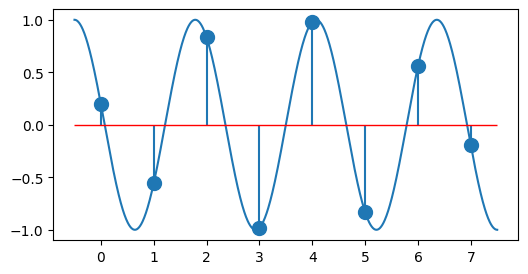

In [61]:
plotCosStem(8,7)